## Before running this notebook, you must have already the numerically simulated waves associated to the representative cases of synthetic simulated TCs (obtained with MaxDiss algorithm in notebook 06)

inputs required: 
  * Synthetic simulation of historical TCs parameters (copulas obtained in notebook 06)
  * MaxDiss selection of synthetic simulated TCs (parameters obtained in notebook 06)
  * simulated waves for the above selected TCs (**outside TeslaKit**)

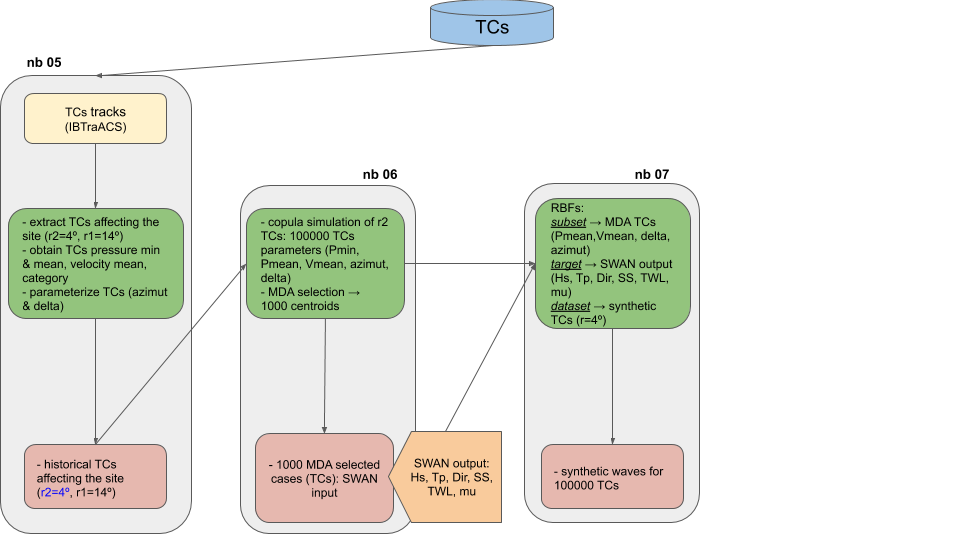

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..'))

# teslakit 
from teslakit.database import Database
from teslakit.io.matlab import ReadMatfile
from teslakit.rbf import RBF_Reconstruction, RBF_Validation
from teslakit.plotting.storms import Plot_TCs_RBFval, Plot_TCs_Params_MDAvsSIM, axplot_scatter_params



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('GUAM')
           

In [3]:
# --------------------------------------
# load data and set parameters

# TCs copula simulated (dataset) and TCs MDA selection
dataset = db.Load_TCs_r2_sim_params()
subset = db.Load_TCs_r2_mda_params()

# solved SWAN simulations for r2 mda TCs  (not solved inside teslakit)
waves_sims = db.Load_TCs_r2_mda_Simulations()

# Reconstructed waves RBF
TCs_RBF_out = db.Load_TCs_sim_r2_rbf_output()


In [4]:
# TODO: our datasets (db.Load_TCs_r2_sim_params and db.Load_TCs_r2_mda_params) 
# do not match with currently stored solved simulations.

# we are using matching matlab files for KWAJALEIN TCs simulations
# (overriding subset so it matches solved target)
#p_test = op.join(p_data, 'tests', 'RBF_GUAM')
#p_subset = op.join(p_test, 'MDA_400_guam.mat')
#subset = ReadMatfile(p_subset)['Subset']  # pmean, vmean, gamma, delta

# full dataset for interpolation
dataset = np.column_stack(
   (dataset['pressure_mean'], dataset['velocity_mean'], dataset['gamma'], dataset['delta'])
)
subset = np.column_stack(
   (subset['pressure_mean'], subset['velocity_mean'], subset['gamma'], subset['delta'])
)


## Validation

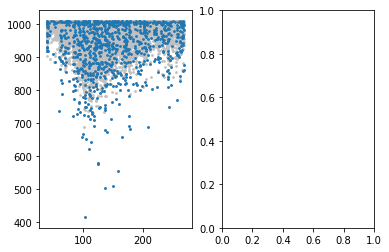

SystemExit: 

In [9]:
#print(subset) # pmean, vmean, gamma, delta
#print(waves_sims)
#print(dataset)
#print(TCs_RBF_out)

#Plot_TCs_Params_MDAvsSIM(subset, dataset);

import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2)
ax[0].scatter(dataset[:,2], dataset[:,0], s=3, c='silver')
ax[0].scatter(subset[:,2], subset[:,0], s=3)
#plt.legend(['dataset','subset'])
plt.show()
sys.exit()


# Historical vs Simulated: scatter plot parameters
F = Plot_TCs_RBFval(subset, waves_sims, dataset, TCs_RBF_out, show=False)

F.savefig('/Users/albacid/Projects/TeslaKit_projects/sites/GUAM/TCs/RBF_val.png', dpi = 600)

In [ ]:
print(np.max(TCs_RBF_out.dir))